In [121]:
#import libraries useful for graphing
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(lubridate)
library(tidyr)
library(forcats)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [122]:
#read in csv
df <- read.csv('SpotifyTop50.csv', fileEncoding = "UTF-8")
head(df)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“invalid input found on input connection 'SpotifyTop50.csv'”

X,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84


In [123]:
#adjust column names
colnames(df) <- tolower(colnames(df))
colnames(df)

[1] "x"                "track.name"       "artist.name"      "genre"           
 [5] "beats.per.minute" "energy"           "danceability"     "loudness..db.."  
 [9] "liveness"         "valence."         "length."          "acousticness.."  
[13] "speechiness."     "popularity"

In [124]:
#further adjust column names
df <- df %>%
rename('id' = 'x' , 'bpm' = 'beats.per.minute', 'loudness' = 'loudness..db..', 'acousticness' = 'acousticness..', 
             'speechiness' = 'speechiness.', 'positivity' = 'valence.', 'length' = 'length.', 
             'track' = 'track.name', 'artist' = 'artist.name')

In [125]:
#clean up data by removing the one empty row
df <- na.omit(df)
head(df)

id,track,artist,genre,bpm,energy,danceability,loudness,liveness,positivity,length,acousticness,speechiness,popularity
<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Senorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84


In [126]:
#learn a little more about the data
summary(df)

       id                                    track              artist 
 Min.   : 1.00   bad guy                        : 1   Ed Sheeran   :2  
 1st Qu.: 4.75   Beautiful People (feat. Khalid): 1   Anuel AA     :1  
 Median : 8.50   boyfriend (with Social House)  : 1   Ariana Grande:1  
 Mean   : 8.50   Callaita                       : 1   Bad Bunny    :1  
 3rd Qu.:12.25   China                          : 1   Billie Eilish:1  
 Max.   :16.00   Goodbyes (Feat. Young Thug)    : 1   Chris Brown  :1  
                 (Other)                        :10   (Other)      :9  
              genre        bpm            energy       danceability  
 pop             :4   Min.   : 93.0   Min.   :41.00   Min.   :40.00  
 dance pop       :3   1st Qu.:101.8   1st Qu.:53.75   1st Qu.:60.25  
 canadian hip hop:1   Median :114.0   Median :64.50   Median :71.50  
 canadian pop    :1   Mean   :129.4   Mean   :62.44   Mean   :68.56  
 country rap     :1   3rd Qu.:156.5   3rd Qu.:68.75   3rd Qu.:79.25  
 dfw

In [127]:
#filter the data based on the summary above. Here I am taking only songs above the mean BPM
#I considered taking the 3rd Quadrant, but it only had 4 songs which did not make for a good graph
fast_songs <-  df %>%
filter(bpm >= 129.4) %>%
arrange(desc(bpm))

fast_songs

id,track,artist,genre,bpm,energy,danceability,loudness,liveness,positivity,length,acousticness,speechiness,popularity
<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
11,Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
14,Otro Trago - Remix,Sech,panamanian pop,176,79,73,-2,6,76,288,7,20,87
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [130]:
#creating a color palette for labeling the artists
#this is good for making more than one graph and keeping colors consistent throughout
color_scheme_fs <- c('#97233F', '#0F4589','#313F36','#C9233F','#3B0160', '#322820', '#DF6108')

In [134]:
#order the songs from least to greatest bpm to match their color scheme
fast_songs$track <- factor(fast_songs$track, levels = c('boyfriend (with Social House)',
                    'Ransom', 'Callaita', 'Otro Trago - Remix', 'Goodbyes (Feat. Young Thug)', 
                    'Old Town Road - Remix', 'bad guy'))

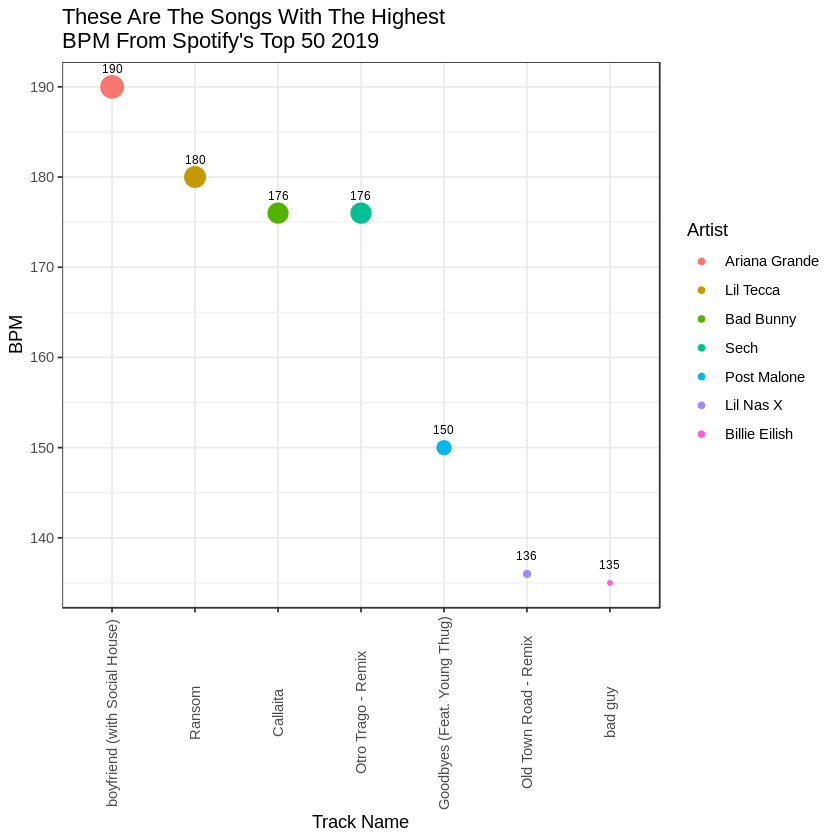

In [152]:
#plot the data in a scatter plot to show the difference in BPM through track and artist 
ggplot(fast_songs, aes(x=track, y=bpm, size =bpm*2)) + #bpm scales by size but the point was small so I mult by 2
    geom_point(aes(color=artist)) + #the color of each point changes by the artist
    scale_fill_manual(values = color_scheme_fs) + #the color scheme uses the one created above
    labs(title='These Are The Songs With The Highest \nBPM From Spotify\'s Top 50 2019',
         x='Track Name', y='BPM') +
    geom_text(aes(label=bpm),vjust = -1.5, colour = "black", size = 2.5) + #put the y axis number right above the points
    scale_size(guide='none') + #remove the legend for the sizes 
    guides(color=guide_legend('Artist')) + theme_bw() + #rename the other legend to Artists & change theme
    theme(axis.text.x = element_text(angle = 90, vjust =0.5)) #adjust the x axis so the text does not overlap or go into the graph
    